In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Feo_analysis_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               644 non-null    object 
 1   Blane_before_hpgr  644 non-null    float64
 2   Blane_after_hpgr   644 non-null    float64
 3   MC%                644 non-null    float64
 4   Drop               644 non-null    float64
 5   710FN3_Damper(%)   644 non-null    float64
 6   Water_Mix1(m3/h)   644 non-null    float64
 7   Water_Mix2(m3/h)   644 non-null    float64
 8   Kiln_Speed(rpm)    644 non-null    float64
 9   710FN1_Damper(%)   644 non-null    float64
 10  730FN1_Damper(%)   644 non-null    float64
 11  Grate_Feed(ton)    644 non-null    float64
 12  OffGas(deg)        644 non-null    float64
 13  WF5(t/h)           644 non-null    float64
 14  WF6(t/h)           644 non-null    float64
 15  Grate_Speed(rpm)   644 non-null    float64
 16  FeO                644 non

In [4]:
df.head()

,Date,Blane_before_hpgr,Blane_after_hpgr,MC%,Drop,710FN3_Damper(%),Water_Mix1(m3/h),Water_Mix2(m3/h),Kiln_Speed(rpm),710FN1_Damper(%),730FN1_Damper(%),Grate_Feed(ton),OffGas(deg),WF5(t/h),WF6(t/h),Grate_Speed(rpm),FeO,P_9-16_mm,Pellet_Feo
0,2019-03-22,1664.166667,1944.333333,9.068056,4.198194,34.56,3.77,2.85,1.72,51.00,32.50,12383.61,827.97,14.54,19.03,6.20,0.721667,86.938333,Good
1,2019-03-23,1664.307692,2014.000000,8.997183,4.894366,34.01,5.68,2.77,1.72,51.98,31.96,12413.71,847.22,17.42,16.49,5.98,0.786667,87.138333,Good
2,2019-03-24,1640.000000,2036.909091,8.795833,4.649583,28.01,5.07,3.07,1.72,46.90,31.49,12277.02,844.50,17.58,18.08,5.98,0.660000,86.723333,Good
3,2019-03-26,1640.090909,2034.181818,9.001493,5.343582,34.39,4.49,4.48,1.72,48.12,32.16,12960.56,805.14,17.68,17.76,6.13,0.853333,88.649167,Not Bad
4,2019-03-28,1593.916667,1998.500000,8.850000,4.608088,38.36,3.44,3.23,1.72,46.31,31.87,12608.12,844.28,18.81,17.56,5.77,0.750833,87.730833,Good


In [5]:
data = df['Pellet_Feo'].value_counts()
data

Good         288
Not Bad      267
Bad           74
Very Good     15
Name: Pellet_Feo, dtype: int64

<AxesSubplot:ylabel='Pellet_Feo'>

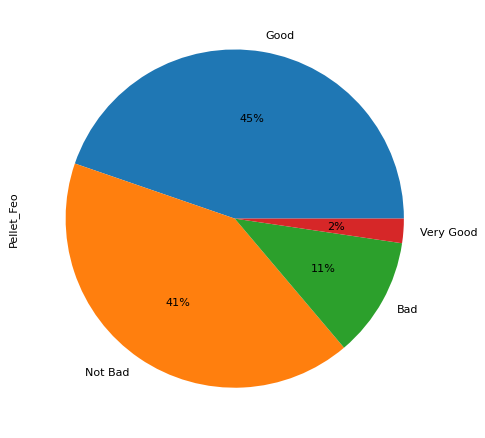

In [6]:
plt.figure(figsize=(15,7),dpi=80)
data.plot.pie(autopct = '%0.0f%%')

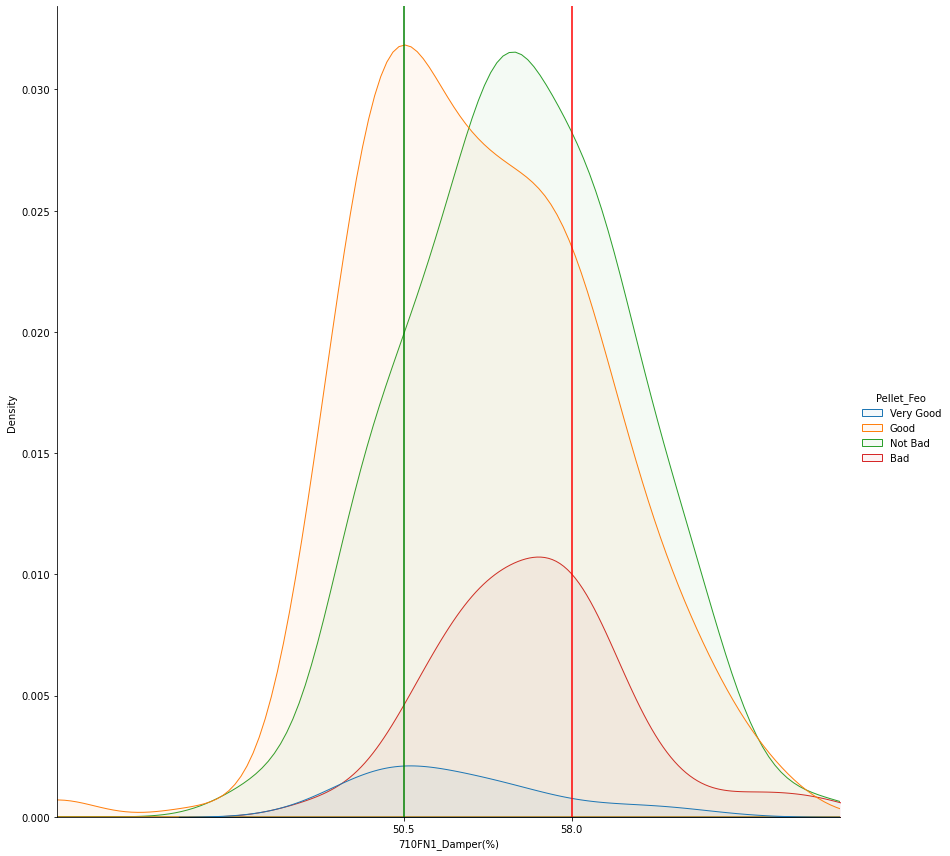

In [34]:
sns.displot(
    data=df,
    x="710FN1_Damper(%)",
    hue="Pellet_Feo",
    hue_order=['Very Good','Good','Not Bad','Bad'],
    kind="kde", height=12,
    fill=True,
    alpha = 0.05,
)
plt.xlim(35,70)
plt.xticks([50.5,58])
plt.axvline(50.5, c='green')
plt.axvline(58, c='red')

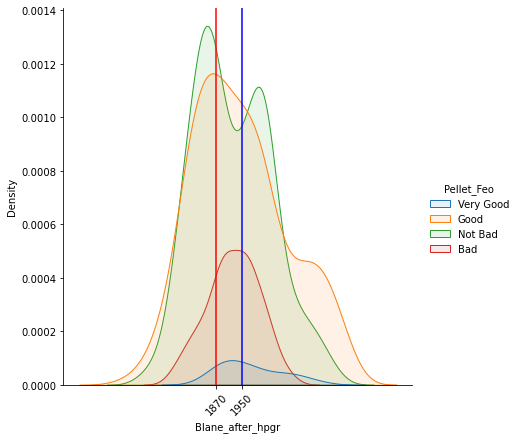

In [35]:
sns.displot(
    data=df,
    x="Blane_after_hpgr", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Not Bad','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.xticks([1870,1950],rotation=45)

plt.axvline(1870, c='red')
plt.axvline(1950, c='blue')
#plt.axvline(56, c='green')

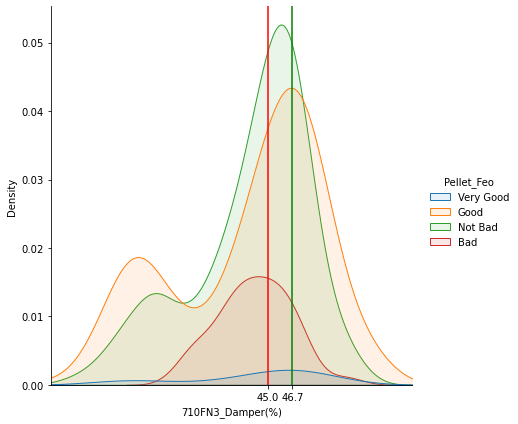

In [36]:
sns.displot(
    data=df,
    x="710FN3_Damper(%)", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Not Bad','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.xlim(30,55)
plt.xticks([45,46.7])
plt.axvline(46.7, c='green')
plt.axvline(45, c='red')

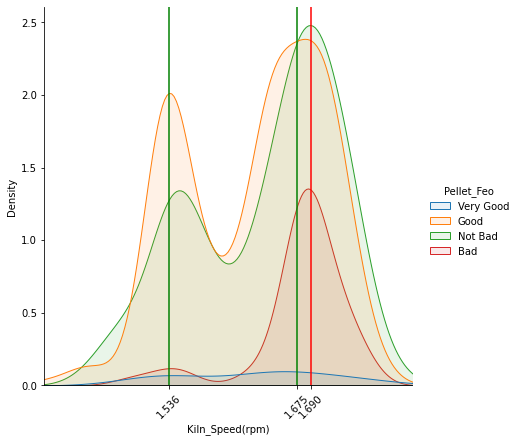

In [37]:
sns.displot(
    data=df,
    x="Kiln_Speed(rpm)", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Not Bad','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.xlim(1.4,1.8)
plt.xticks([1.536,1.675,1.69],rotation=45)
plt.axvline(1.536, c='green')
plt.axvline(1.675, c='green')
plt.axvline(1.69, c='red')

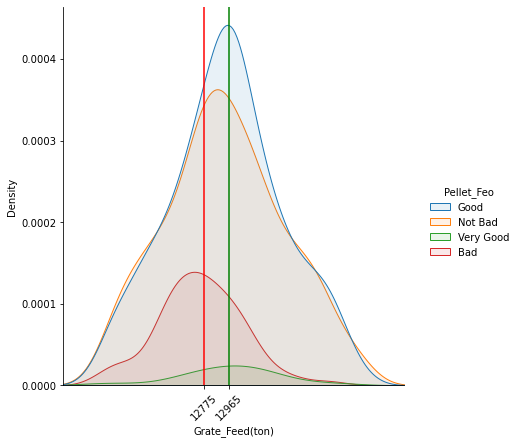

In [11]:
sns.displot(
    data=df,
    x="Grate_Feed(ton)", hue="Pellet_Feo",
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.xlim(11700,14300)
plt.xticks([12775,12965],rotation=45)
plt.axvline(12965, c='green')
plt.axvline(12775, c='red')

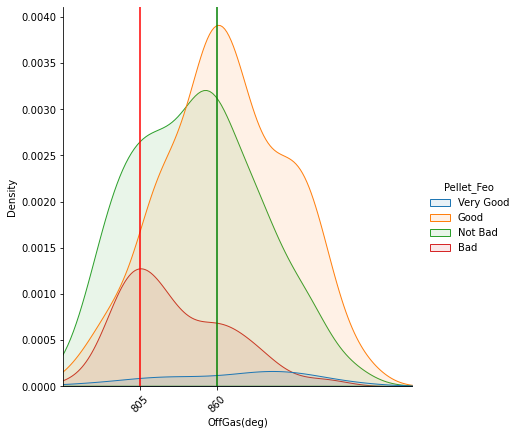

In [38]:
sns.displot(
    data=df,
    x="OffGas(deg)", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Not Bad','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.xlim(750,1000)
plt.xticks([805,860],rotation=45)
plt.axvline(860, c='green')
plt.axvline(805, c='red')

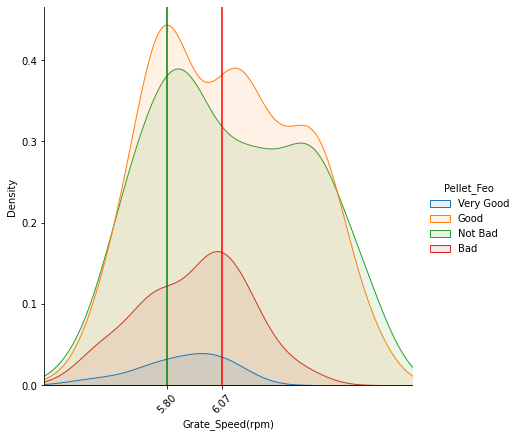

In [39]:
sns.displot(
    data=df,
    x="Grate_Speed(rpm)", hue="Pellet_Feo",
    hue_order=['Very Good','Good','Not Bad','Bad'],
    kind="kde", height=6,
    fill=True,
    alpha = 0.1,
)
plt.xlim(5.2,7)
plt.xticks([5.8,6.07],rotation=45)
plt.axvline(5.8, c='green')
plt.axvline(6.07, c='red')